<center><h1>Projeto 3 - Ciência dos Dados </h1></center>
<center><h5>Alexandre Zamberlan Filho</h5></center>
<center><h5>Caio Horschutz Fauza</h5></center>
<center><h5>Pedro Paulo Mendonça Telho</h5></center>
 

> <b>Tema:</b> Previsão da modalidade esportiva que um atleta, baseando-se em características pré-definidas, deve praticar.        
><b>Metodologia:</b> Clusterização  ou classificação (ainda em análise de performance)  
><b>Dataset utilizado:</b> "120 years of Olympic History of athletes and results" (Kaggle) 

# Parte 1: Coleta e Desenvolvimento dos dados

### 1.1 : Leitura do dataset "120 years of Olympic History of athletes and results"

In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

geral = pd.read_csv("athlete_events.csv")
geral.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1.2: Análise primária baseadas nos dados

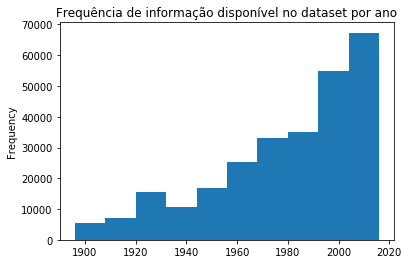

In [2]:
geral["Year"].plot.hist(title = "Frequência de informação disponível no dataset por ano")

In [3]:
sports  = pd.unique(geral["Sport"]).tolist()
versions = pd.unique(geral["Games"]).tolist()
citys = pd.unique(geral["City"]).tolist()

print("Quantidade de modalidades disponíveis no dataframe: " + str(len(sports)))
print("Quantidade de versões dos jogos olímpicos disponíveis no dataframe: " + str(len(versions)))
print("Quantidade de cidades sedes dos jogos olímpicos disponíveis no dataframe (Verão + Inverno): " + str(len(citys)))

Quantidade de modalidades disponíveis no dataframe: 66
Quantidade de versões dos jogos olímpicos disponíveis no dataframe: 51
Quantidade de cidades sedes dos jogos olímpicos disponíveis no dataframe (Verão + Inverno): 42


Média de peso dos atletas: 70.70239290053351


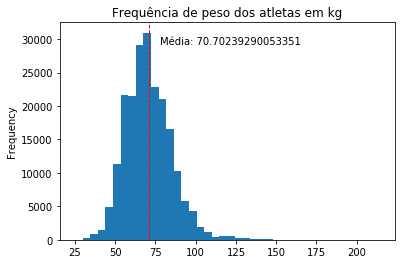

In [4]:
geral["Weight"].plot.hist(title = "Frequência de peso dos atletas em kg", bins=40)

plt.axvline(geral["Weight"].mean(), color='r', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()

plt.text(geral["Weight"].mean() + geral["Weight"].mean()/10, max_ - max_/10, 'Média: {}'.format(geral["Weight"].mean()))

print("Média de peso dos atletas: " + str(np.mean(geral["Weight"])))

É notavel assimetria nos dados em relação ao peso dos atletas. Os índices de maiores frequências estão localizados entre 50 e 80 kg aproximadamente.

Média de altura dos atletas: 175.33896987366376


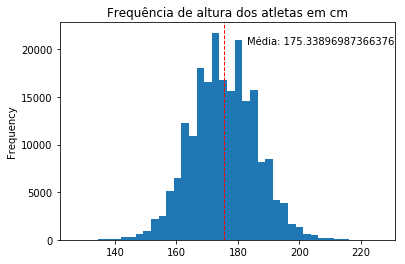

In [5]:
geral["Height"].plot.hist(title = "Frequência de altura dos atletas em cm", bins=40)

plt.axvline(geral["Height"].mean(), color='r', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()

plt.text(geral["Height"].mean() + geral["Height"].mean()/23, max_ - max_/10, 'Média: {}'.format(geral["Height"].mean()))

print("Média de altura dos atletas: " + str(np.mean(geral["Height"])))

É possível definir uma pequena simetria, de pouco valor nos dados relacionados a altura. Os índices de maiores frequências estão localizados entre 1,7 m e 1,85m aproximadamente.

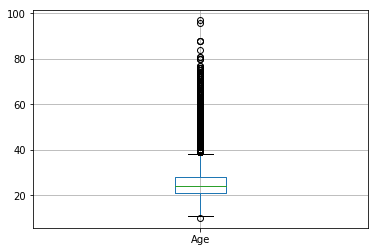

In [6]:
geral.loc[:,["Age"]].boxplot()

Média de idade dos atletas: 25.556898357297374


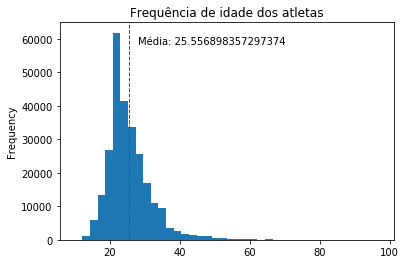

In [7]:
geral["Age"].plot.hist(title ="Frequência de idade dos atletas", bins=40)

plt.axvline(geral["Age"].mean(), color='r', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()

plt.text(geral["Age"].mean() + geral["Age"].mean()/10, max_ - max_/10, 'Média: {}'.format(geral["Age"].mean()))

print("Média de idade dos atletas: " + str(np.mean(geral["Age"])))

### 1.3 Análise da correlação entre os dados

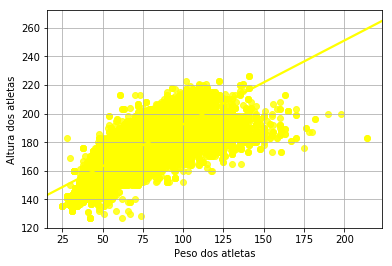

Índice de correlação (R) entre o peso e a altura dos atletas: 0.7962130921161656


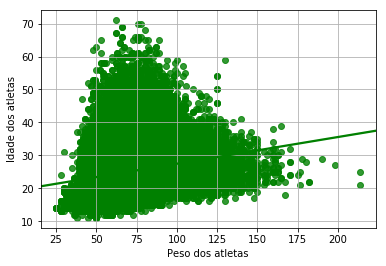

Índice de correlação (R) entre o peso e a idade dos atletas: 0.21206886474816442


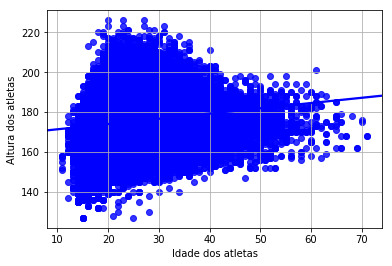

Índice de correlação (R) entre a idade a altura dos atletas: 0.13824647072838908


In [8]:
import numpy as np
import seaborn as sns

grafico1 = sns.regplot(geral['Weight'], geral['Height'], color='yellow');
plt.xlabel('Peso dos atletas')
plt.ylabel('Altura dos atletas')
plt.grid()
plt.show()
print('Índice de correlação (R) entre o peso e a altura dos atletas: '+str(geral.corr()['Weight']['Height']))

grafico2 = sns.regplot(geral['Weight'], geral['Age'], color='green');
plt.xlabel('Peso dos atletas')
plt.ylabel('Idade dos atletas')
plt.grid()
plt.show()
print('Índice de correlação (R) entre o peso e a idade dos atletas: '+str(geral.corr()['Weight']['Age']))

grafico3 = sns.regplot(geral['Age'], geral['Height'], color='blue');
plt.xlabel('Idade dos atletas')
plt.ylabel('Altura dos atletas')
plt.grid()
plt.show()
print('Índice de correlação (R) entre a idade a altura dos atletas: '+str(geral.corr()['Age']['Height']))

Entre as três análises pode-se perceber que entre peso e altura dos atletas há maior correlação. Esse índice nos indica o nível de dependência entre as variáveis e, portanto, nos mostra que essas duas variáveis são mais importantes se analisadas juntas.

### 1.4: Exemplo de aplicação da técnica

A técnica utilizada dependerá do teste de performance comparativo entre um algorítimo cluster e um classificador, sendo escolhido o de melhor desempenho.

#### Clusterização:
   O algorítimo de clusterização seguirá o método K-Means e DBSCAN da biblioteca scikit learn. Os modelos foram escolhidos devido a grande quantidade de dados, que é mais adequada se for aplicada em tais métodos. Será executado um código que interpreta índices determinados previamente e faz a previsão de qual esporte um atleta deve praticar, se baseando em algumas características.
    
#### Classificação:
   O algorítimo de classificação seguirá o método SGD classifier da biblioteca scikit learn. O modelo foi escolhido por ser apropriado para um grande número de dados. Será feita uma classificação dos dados existentes para prever qual esporte um atleta deveria praticar.
    

### 2: Algorítimo:

#### 2.1 Separação e visualização dos índices utilizados para o machine learning (Idade, Peso e Altura)

NameError: name 'dados' is not defined

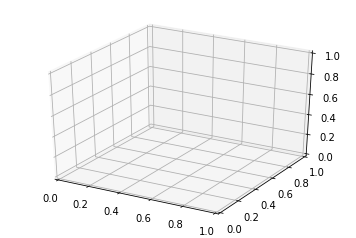

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt3d = plt.figure().gca(projection="3d")
plt3d.scatter(dados.Age, dados.Weight, dados.Height)

#### 2.2: Clusterização (Machine Learning não supervisionado)

Inicialmente, foi testada a metodologia K-Means (devido ao grande número de dados) da biblioteca scikit learn, levando em consideração para a clusterização altura dos atletas, idade e peso, como índices para separação em grupos. O número de clusters selecionado foi o número total de esportes disponíveis no dataframe. Todos os esportes de verão foram considerados. 

In [9]:
#Separação em Base de treinamento/testes

from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(geral, test_size = 0.2)

In [10]:
#MiniBatchKMeans
sports = pd.unique(datatrain["Sport"]).tolist()
nclusters = len(datatrain["Sport"].value_counts())


trainloc = datatrain.loc[:,("Age", "Height", "Weight")]
trainsummer = trainloc[datatrain.Season == "Summer"]
traindados = trainsummer.dropna()

minibatch = cluster.MiniBatchKMeans(n_clusters= nclusters, random_state = 0)

output = minibatch.fit_predict(traindados)

grupos = pd.DataFrame(datatrain.Sport)
grupos['Grupo'] = pd.Series(output)
pd.crosstab(grupos.Sport, grupos.Grupo)

Grupo,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0
Sport,,,,,,,,,,,,,,,,,,,,,
Alpine Skiing,92,76,28,108,9,89,80,73,18,77,...,98,31,14,64,16,34,108,34,107,98
Alpinism,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Archery,19,14,8,25,2,23,17,11,2,32,...,18,5,3,11,4,12,21,10,22,35
Art Competitions,35,19,12,43,3,24,34,29,9,44,...,44,12,8,27,5,15,51,10,45,52
Athletics,328,268,118,470,32,287,324,292,56,439,...,414,113,69,283,61,132,401,137,431,439
Badminton,9,9,6,17,1,14,13,8,1,26,...,14,4,3,5,4,5,13,7,7,11
Baseball,4,4,5,12,0,4,7,8,2,5,...,4,2,2,4,2,5,12,3,5,8
Basketball,31,37,15,45,6,34,39,35,7,67,...,54,16,8,26,5,22,48,23,61,52
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Com a aplicação do método, foi perceptível a dominância da modalidade atletismo em todos os grupos, o que invalida tal método. Então, foi testado outro método do scikit learn para a clusterização: o DBSCAN (devido ao grande número de dados). Os mesmos índices anteriores foram utilizados, além de serem levados em consideração todos os esportes.

In [9]:
#DBSCAN 
from sklearn.cluster import DBSCAN

trainloc = datatrain.loc[:,("Age", "Height", "Weight")]
trainsummer = trainloc[datatrain.Season == "Summer"]
traindados = trainsummer.dropna()


dbscan = cluster.DBSCAN()
output = dbscan.fit_predict(traindados)

grupos = pd.DataFrame(datatrain.Sport)
grupos['Grupo'] = pd.Series(output)
tabela = pd.crosstab(grupos.Sport, grupos.Grupo)
tabela

NameError: name 'datatrain' is not defined

O método DBSCAN também não foi adequado, uma vez que resultou em um número muito grande de grupos e na concentração dos dados em 1 único grupo, em que também é notável a dominância do atletismo.

Partindo disso, foi decidido simplificar e tentar utilizar alguns esportes selecionados:

In [10]:
geral7 = pd.concat([geral[geral.Sport=="Basketball"], geral[geral.Sport=="Wrestling"], geral[geral.Sport=="Swimming"], 
                   geral[geral.Sport=="Shooting"], geral[geral.Sport=="Athletics"], geral[geral.Sport=="Gymnastics"],
                   geral[geral.Sport=="Equestrianism"]])

from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(geral7, test_size = 0.2)


In [11]:
nclusters = len(datatrain["Sport"].value_counts())


select = datatrain.loc[:,("Age", "Height", "Weight")]
select1 = select.dropna()

minibatch1 = cluster.MiniBatchKMeans(random_state = 0)
output1 = minibatch1.fit_predict(select1)

grupos = pd.DataFrame(datatrain.Sport)
grupos['Grupo'] = pd.Series(output1)
tabela = pd.crosstab(grupos.Sport, grupos.Grupo)

tabela


Grupo,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Sport,,,,,,,,
Athletics,2462,1594,354,1109,670,748,1763,144
Basketball,279,205,43,127,67,84,197,17
Equestrianism,429,264,55,177,107,128,295,26
Gymnastics,1345,943,196,634,375,485,1060,83
Shooting,700,466,106,280,168,261,498,44
Swimming,1321,892,203,610,345,464,1031,96
Wrestling,407,277,57,170,130,141,274,23


Mesmo com um número menor de esportes, o clustering não foi adequado, devido a dominância do grupo atletismo em todos os grupos criados. Então, foi decidido partir para um classificador.

#### 2.2: Classificador.

Primeiramente, organiza-se as linhas do Dataframe retirando aquelas que não possuem dados e separanda para análise as características necessárias para criação do Machine Learning (Idade, Altura e Peso dos atletas).

In [16]:
analise = geral7[["Age", "Height", "Weight", "Sport"]]
analise_nan = analise.dropna()
caracter = analise_nan[["Age", "Height", "Weight"]]
esportes = analise_nan["Sport"]

Transformando os dados em array pois é assim que o machine learning realiza suas análises.

In [17]:
X = np.array(caracter)
y = np.array(esportes)

Separamos agora 20% dos dados para base de testes e 80% dos dados para base de treinamento.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Finalmente aplicamos os dados obtidos às funções do nosso classificador.

In [22]:
from sklearn.svm import SVC

clf = SVC(gamma='auto', kernel='rbf', C = 1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

Decidimos utilizar o classificador SVC devido a quantidade de dados inferior a 100 mil amostras.